<a href="https://colab.research.google.com/github/pdbayes/notebooks/blob/main/gradient_descent_for_beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"This code demonstrates a simple machine learning model using a technique called gradient descent. Instead of relying on specialized machine learning libraries, it's built from scratch using basic Python code.

The model focuses on a fundamental relationship between two variables, 'x' and 'y', expressed as a linear equation: y = w * x + b. Think of this equation as representing a straight line on a graph where 'x' and 'y' are the coordinates. The goal is to find the best values for 'w' and 'b' that accurately convert temperatures from Celsius to Fahrenheit.

Gradient descent is an iterative process used to find these optimal values. Imagine the model starting with random guesses for 'w' and 'b'. It then checks how far off its predictions are from the actual Fahrenheit temperatures. Based on this error, it adjusts 'w' and 'b' slightly, aiming to get closer to the correct answer. This adjustment process is repeated many times, similar to making small course corrections to reach a destination.

We've set the model to run for 7000 iterations (epochs), giving it plenty of opportunities to refine its predictions. 'w' and 'b' are the key parameters in the conversion formula: Fahrenheit = Celsius * 1.8(w) + 32(b). Ideally, 'w' would be 1.8 and 'b' would be 32 for a perfect conversion. We'll see how close our model gets!"!

#Visual example
This video represents the progress of a linear function (line on the graph) moving from the original guess of the input variables, to the correct, or as near as possible, correct values. You may want to come back to it once you have finished the notebook.

In [34]:
#@title Code for video, not necessary to understand, so hidden
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Define the function for the curve
def f(x):
    return x**2

# Define the range of x values
x = np.linspace(-2, 2, 100)

# Define the learning rate
learning_rate = 0.1

# Initial guess for the minimum
x_current = 1.5

# Create the figure and axes
fig, ax = plt.subplots()
ax.plot(x, f(x), color='blue')  # Plot the curve
point, = ax.plot(x_current, f(x_current), marker='o', color='red')  # Plot the current point
line, = ax.plot([], [], color='green', linestyle='--', linewidth=2)  # Initialize the tangent line

ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Gradient Descent')

# Animation update function
def update(frame):
    global x_current

    # Calculate the gradient at the current point
    gradient = 2 * x_current

    # Update the current point using gradient descent
    x_current = x_current - learning_rate * gradient

    # Update the point and tangent line positions
    point.set_data([x_current], [f(x_current)])

    # Calculate tangent line points (extended range)
    tangent_x = np.linspace(x_current - 1, x_current + 1, 10)  # Extended range
    tangent_y = f(x_current) + gradient * (tangent_x - x_current)
    line.set_data(tangent_x, tangent_y)

    return point, line

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=20, interval=200, blit=True)

# Embed the animation as an HTML5 video
plt.close(fig)  # Close the static plot
HTML(ani.to_html5_video())

```
#Importing Libraries

import random
import matplotlib.pyplot as plt
```
**import random:** This line imports the random module. This module provides functions for generating random numbers, which can be useful in various tasks like simulations or initializing values.  
**import matplotlib.pyplot as plt:** This line imports the pyplot module from the matplotlib library and assigns it the alias plt. Matplotlib is a popular library for creating visualizations in Python, and pyplot provides a convenient interface for creating various types of plots and charts.
Initializing Lists

**modW=[]** This line creates an empty list called modW. Lists are used to store collections of items in Python. This particular list will be used to store values related to weights in the code that follows.  
**modB=[]:** This line similarly creates an empty list called modB, which would most likely be used to store values related to biases in the subsequent code.
Defining a Class
```
class nanoNeuron:
  def __init__(self, w, b):
    self.w = w
    self.b = b

def predict(self, x):
  return x * self.w + self.b
```

**class nanoNeuron: **This line defines a class called nanoNeuron. In object-oriented programming, a class is a blueprint for creating objects.   
Think of this class as representing a simple neuron model.  
**def __init__(self, w, b):** This line defines the constructor of the class, also known as an initializer. This will be executed when new objects of the nanoNeuron class are created using nanoNeuron(w, b). It takes two arguments: w and b, which will be assigned as attributes to the object. (self references to the object itself).  
**self.w = w:** This line assigns the value of the w argument to the object's w attribute, most likely representing the weight.  
**self.b = b:** This line assigns the value of the b argument to the object's b attribute, most likely representing the bias.   
**def predict(self, x):**: This line defines a method (a function inside a class) called predict. This method takes an input x and is most likely designed to give a prediction based on the neuron's weights and bias.
**return x * self.w + self.b:** This line calculates and returns the output, or prediction, which is simply x multiplied by w (the weight) plus b (the bias). This is a typical linear neuron output.  
**In summary**, this code defines a very basic model of a neuron (a "nanoNeuron") with weight (w), bias (b) and provides it with a predict method to apply a simple calculation for output. It also has setup code to create visualizations and manage model parameters (weights and biases).

In [35]:
import random
import matplotlib.pyplot as plt

modW=[]
modB=[]

class nanoNeuron:

    def __init__(self, w, b):
        self.w = w
        self.b = b

    def predict(self, x):
        return x * self.w + self.b

# Convert Celsius values to Fahrenheit using formula: f = 1.8 * c + 32.
Ultimately we want to teach our NanoNeuron to imitate this function (to learn
that w = 1.8 and b = 32) without knowing these parameters in advance.  
**c** - temperature in Celsius.   
**f** - calculated temperature in Fahrenheit.

In [36]:
def celsiusToFahrenheit(c):
    w = 1.8
    b = 32
    f = c * w + b
    return f

# Generate training and test data-sets based on celsiusToFahrenheit function.
The data-sets consist of pairs of input values and correctly labeled output values.
In most cases in real life this data would be collected rather than generated.  
For example we might have a set of images of hand-drawn numbers and corresponding set of numbers that explain what number is written on each picture.

# Function: generateDataSets
This code defines a function called generateDataSets. The purpose of this function is to create two sets of data: a training dataset and a test dataset.  
These datasets are essential for training and evaluating the performance of the nanoNeuron we saw earlier.

```
def generateDataSets():
    training_data_set = []
    for celsius in range(-50, 50):
        fahrenheit = celsiusToFahrenheit(celsius)
        training_data_set.append([celsius, fahrenheit])

    # Generate TEST examples.
    test_data_set = []
    for celsius in range(-5, 5):
        fahrenheit = celsiusToFahrenheit(celsius)
        test_data_set.append([celsius, fahrenheit])

    return training_data_set, test_data_set
```
# Generating Training Data
**Initialization:**

**training_data_set = []:** An empty list called training_data_set is created to store the training data.  
**Looping through Celsius Values:**

**for celsius in range(-50, 50):** This loop iterates through Celsius temperatures from -50 to 49.  
1. **Calculating Fahrenheit:**
 * **fahrenheit = celsiusToFahrenheit(celsius):** For each Celsius value, the corresponding Fahrenheit value is calculated using the celsiusToFahrenheit function (which was defined earlier in the code and is assumed to be available).
2. **Appending to Training Data:**
 * **training_data_set.append([celsius, fahrenheit]):** A list containing the Celsius value and its corresponding Fahrenheit value is appended to the training_data_set list. This creates a collection of data points for training.
3. **Generating Test Data**
 * The process for generating test data is very similar to the training data generation
4. **Initialization:**
 * test_data_set = []: An empty list called test_data_set is created to store the test data.  
5. **Looping through Celsius Values:**
 * for celsius in range(-5, 5):: This loop iterates through Celsius temperatures from -5 to 4.  
6. **Calculating Fahrenheit:**
 * **fahrenheit = celsiusToFahrenheit(celsius):** The corresponding Fahrenheit value is calculated.  
7. **Appending to Test Data:**
 * **test_data_set.append([celsius, fahrenheit]):** The Celsius-Fahrenheit pair is appended to the test_data_set.
8. **Returning the Datasets**
 * **return training_data_set, test_data_set:** The function returns both the training_data_set and test_data_set lists.  
In essence, this function prepares the data needed to teach and evaluate the nanoNeuron. The training data is used to help the neuron learn the relationship between Celsius and Fahrenheit, while the test data is used to see how well the neuron can predict Fahrenheit values for new Celsius inputs it hasn't seen before.

In [37]:
# Generate TRAINING examples.
def generateDataSets():
    training_data_set = []
    for celsius in range(-50, 50):
        fahrenheit = celsiusToFahrenheit(celsius)
        training_data_set.append([celsius, fahrenheit])

    # Generate TEST examples.
    test_data_set = []
    for celsius in range(-5, 5):
        fahrenheit = celsiusToFahrenheit(celsius)
        test_data_set.append([celsius, fahrenheit])

    return training_data_set, test_data_set


  # Generate data
  This code defines a function called generate_data.   
  The primary purpose of this function is to create two sets of data: a training dataset and a test dataset. These datasets are used to train and evaluate the nanoNeuron machine learning model.    
  By starting the test set from 0.5 instead of zero and using the same step of 1 as we have used for the training set, we make sure that test set has different data compared to the training set.

In [38]:
def generate_data():
  xTrain = []
  yTrain = []
  for x in range(0, 100):
      y = celsiusToFahrenheit(x)
      xTrain.append(x)
      yTrain.append(y)

  xTest = []
  yTest = []
  for x in range(0, 100, 1):
    x = x + 0.5  # Ensure test data differs from training data
    y = celsiusToFahrenheit(x)
    xTest.append(x)
    yTest.append(y)

  return [xTrain, yTrain, xTest, yTest]

# Understanding Prediction Error: The predictionCost Concept
In machine learning, it's essential to measure how well a model is performing. One key way to do this is by calculating the prediction error or cost. This tells us how far off the model's predictions are from the actual, correct values.

*The predictionCost concept* is all about quantifying this error for a single prediction. Think of it like this: **the model makes a guess, and the predictionCost function tells us how good (or bad) that guess was.**

**How is the error calculated?**

1. **Find the difference:** First, we find the difference between the model's prediction and the actual value we were trying to predict.
Square the difference: Next, we square this difference. This step ensures that the error is always a positive number, regardless of whether the prediction was too high or too low.  
2. **Divide by two:** Finally, we divide the squared difference by 2. This is a mathematical trick that makes later calculations within the learning process easier.   
3. **Why is this important?**   
The resulting value, called the cost, represents the error of the prediction. **The lower the cost, the better the prediction was.** This cost is used by the learning algorithm (gradient descent, in this case) to guide the model towards better predictions over time.  
**In short:**   
The predictionCost concept is a way to measure how well the model is doing for a single prediction. It's a key component of the learning process, helping the model improve its accuracy with each step. The lower the cost, the better the model's prediction!#

In [39]:
def predictionCost(y, prediction):
    return (y - prediction) ** 2 / 2  # i.e. -> 235.6

### Forward Propagation Function Explanation


This function simulates the "forward" pass of data through our simple neural network model. Here's a breakdown:

1. **Initialization:**
   - It gets the total number of training examples.
   - It creates an empty list to store model predictions.
   - It initializes a variable to accumulate the total error (cost).

2. **Looping Through Training Examples:**
   - It iterates through each training example.
     - It gets a prediction for the current input using the model.
     - It calculates the error of the prediction compared to the actual expected output using a separate function and adds it to the total cost.
     - It stores the prediction in the predictions list.

3. **Calculating Average Cost:**
   - It divides the total cost by the number of examples to get the average cost per example.

4. **Returning Results:**
   - It returns a list containing all the predictions made and the average cost.


**In simpler terms:**

Imagine a machine learning model as a simple machine that you are teaching to convert Celsius to Fahrenheit. This function feeds the machine a bunch of Celsius temperatures and compares its output (predictions) with the correct Fahrenheit values. It calculates how wrong the machine is (the cost) and gives you a summary: all the guesses the machine made and how wrong it was on average. This information is then used to adjust the machine to make it better at converting temperatures.

In [40]:
def forwardPropagation(model, xTrain, yTrain):
    m = len(xTrain)
    predictions = []
    cost = 0
    for i in range(0, m):
        prediction = model.predict(xTrain[i])
        cost += predictionCost(yTrain[i], prediction)
        predictions.append(prediction)
    # We are interested in average cost.
    cost /= m
    return [predictions, cost]

#backwardPropagation Function
This function is a crucial part of the machine learning model's training process. It's called backpropagation because it essentially goes "backwards" through the model to figure out how to adjust its internal parameters to make better predictions.

Here's a step-by-step explanation:

1. **Initialization:**  
 * m = len(xTrain): This line gets the total number of training examples stored in the xTrain variable.  
 *dW = 0: Initializes a variable dW to 0. This variable will store the calculated change needed for the model's 'w' parameter (weight).  
 *dB = 0: Initializes a variable dB to 0. This variable will store the calculated change needed for the model's 'b' parameter (bias).
2. **Looping and Calculating Adjustments:**

 * **for i in range(0, m):**: This loop iterates through each training example.
 * **dW += (yTrain[i] - predictions[i]) * xTrain[i]:** This line calculates the adjustment needed for the 'w' parameter. It's based on the difference between the actual value (yTrain[i]) and the model's prediction (predictions[i]), multiplied by the input value (xTrain[i]). This calculation is derived from calculus (the derivative of the cost function) and helps determine the direction and magnitude of the adjustment.  
 * **dB += yTrain[i] - predictions[i]:** This line calculates the adjustment needed for the 'b' parameter. It's simply the difference between the actual value and the prediction.
3. **Averaging Adjustments:**
 * **dW /= m:** Divides the accumulated adjustment for 'w' by the total number of training examples to get the average adjustment.
 * **dB /= m:** Divides the accumulated adjustment for 'b' by the total number of training examples to get the average adjustment.
4. **Returning Adjustments:**
 * **return [dW, dB]:** The function returns the calculated average adjustments for 'w' and 'b', which will be used to update the model's parameters in the main training loop.

# In simpler terms:

Imagine you're trying to teach a child to throw a ball at a target. Backpropagation is like analyzing where the ball landed (the prediction) compared to where it should have landed (the actual target).  
It then calculates how to adjust the child's throwing technique (the model's parameters) to make the next throw more accurate.  
**dW** and **dB** represent these adjustments, guiding the model towards better predictions.

# tryingw and tryingb Variables

**tryingw = []:** This line creates an empty list called tryingw. This list will likely be used during the training process to store the different values of the 'w' parameter as the model learns.  
**tryingb = []:** Similarly, this line creates an empty list called tryingb to store the different values of the 'b' parameter during training.  
These lists are used to track the model's progress and to visualize how the parameters change over time as it gets better at making predictions.

In [41]:
def backwardPropagation(predictions, xTrain, yTrain):
    m = len(xTrain)
    dW = 0
    dB = 0
    for i in range(0, m):
        dW += (yTrain[i] - predictions[i]) * xTrain[i]
        dB += yTrain[i] - predictions[i]
    dW /= m
    dB /= m
    return [dW, dB]

tryingw = []
tryingb = []

# The trainModel Function
This function is the heart of the machine learning process. It's where the model iteratively learns to make better predictions. Let's break it down step-by-step:

1.  **Initialization:**

It starts by creating an empty list called costHistory. This list will store the model's error after each training cycle (epoch).
It initializes a counter variable named epoch to 0. This variable keeps track of the current training cycle.
2. **Training Loop:**

* The core of the function is a while loop that runs for a
specified number of epochs. This loop represents the iterative training process.  
* * Inside the loop, it calls the forwardPropagation function. This function simulates a "forward pass" of data through the model, generating predictions and calculating the average error (cost) for the current training data.
* * The calculated error is then added to the costHistory list, allowing us to track the model's progress over time.
* * Next, it calls the backwardPropagation function. This function performs a "backward pass" through the model, analyzing the errors and calculating adjustments for the model's internal parameters (weights and biases).
* * The model's parameters are then updated using the calculated adjustments and a learning rate (alpha). The learning rate controls how much the parameters are adjusted in each step.
* * The updated parameter values are appended to the tryingw and tryingb lists, allowing us to monitor how the parameters evolve during training.
* * Finally, the epoch counter is incremented to move to the next training cycle.
3. **Returning the Cost History:**

* After the training loop completes, the function returns the costHistory list. This list contains the model's error after each epoch, providing insights into the learning process and how the model's performance improved over time.  



# In simpler terms:

Imagine you're teaching a dog to fetch a ball. Each epoch is like a training session. In each session:

1.  You throw the ball (forward propagation).
2. You see how far off the dog was from fetching it correctly (calculate cost).  
3. You give the dog feedback and adjust its training based on its performance (backward propagation and parameter updates).  
4. You record how well the dog did in this session (append to costHistory).  

You repeat this process for a set number of sessions (epochs) to train the dog. The costHistory shows you how the dog's performance improved over time.

In [42]:
def trainModel(model, epochs, alpha, xTrain, yTrain):
    costHistory = []

    epoch = 0

    while epoch < epochs:

        [predictions, cost] = forwardPropagation(model, xTrain, yTrain)
        costHistory.append(cost)
        [dW, dB] = backwardPropagation(predictions, xTrain, yTrain)
        model.w += alpha * dW
        model.b += alpha * dB
        tryingw.append(model.w)
        tryingb.append(model.b)
        epoch += 1
    return costHistory

# The evaluate_model Function
This function is designed to assess how well your trained machine learning model performs on unseen data (the test data). Essentially, it's like giving your model a final exam after it has been trained.

Here's a breakdown:

1. **Function Definition:**
* def evaluate_modelThis line defines a function named evaluate_model. Functions are blocks of reusable code that perform specific tasks.
* (model, xTest, yTest): This part specifies the inputs the function expects:
* * model: The trained machine learning model.
* *  xTest: The input values of the test data.
* * yTest: The corresponding correct output values for the test data.

2. **Initialization:**

* **correct_predictions = 0:** A variable to keep track of the number of correct predictions made by the model. It starts at 0.
* **total_predictions = len(xTest):** Stores the total number of predictions to be made, which is equal to the number of data points in the test set (xTest).  

3. **Prediction and Comparison:**

* for i in range(total_predictions):: This loop iterates through each data point in the test set.
prediction = model.predict(xTest[i]): The model makes a * prediction for the current input (xTest[i]).
* tolerance = 0.5: A tolerance value is defined. This means that a prediction is considered correct if it is within this tolerance range of the actual value.
* if abs(prediction - yTest[i]) <= tolerance:: This condition checks if the absolute difference between the prediction and the actual value (yTest[i]) is less than or equal to the tolerance. If so, it's counted as a correct prediction, incrementing correct_predictions by 1.  

4. **Accuracy Calculation and Return:**.

* **accuracy = (correct_predictions / total_predictions) * 100:** The accuracy of the model is calculated as the percentage of correct predictions out of the total predictions.
* return accuracy: The function returns the calculated accuracy value.  

# In simpler terms:

This function takes a trained model and a set of test data. It uses the model to make predictions on the test data and then compares these predictions to the actual values.   It allows for a small margin of error (tolerance) when determining if a prediction is correct. Finally, it calculates and returns the overall accuracy of the model on the test data as a percentage. This gives you a measure of how well the model is likely to perform on new, unseen data.


In [43]:
def evaluate_model(model, xTest, yTest):
    """Evaluates the model's accuracy on the test data."""
    correct_predictions = 0
    total_predictions = len(xTest)

    for i in range(total_predictions):
        prediction = model.predict(xTest[i])
        # Define a tolerance for considering a prediction correct
        tolerance = 0.5  # You can adjust this based on your needs
        if abs(prediction - yTest[i]) <= tolerance:
            correct_predictions += 1

    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

# Initializing the Model

**w = random.random():** This line generates a random number between 0 and 1 and assigns it to the variable w.
This variable represents the weight of the input in our simple model. Think of it like a knob that controls how much influence the input has on the output. We start with a random value because the model doesn't know the correct weight yet.  
**b = random.random():** Similar to the previous line, this one generates another random number between 0 and 1 and assigns it to the variable b. This variable represents the bias of the model. It's like a baseline value that the model starts with.  
**NanoNeuron = nanoNeuron(w, b):** This line creates an instance of the nanoNeuron class, which is our simple model. We're giving it the random w and b values we generated as initial parameters. This essentially sets up the starting point for the model's learning process.
# Generating the Data

1. **[xTrain, yTrain, xTest, yTest] = generate_data():** This line calls a function named generate_data() which is responsible for creating the datasets used to train and test the model.  
* * xTrain: Input values (Celsius temperatures) for training.
* * yTrain: Corresponding correct output values (Fahrenheit temperatures) for training.
* * xTest: Input values (Celsius temperatures) for testing.
* * yTest: Corresponding correct output values (Fahrenheit temperatures) for testing.
* These lists are then assigned to the variables xTrain, yTrain, xTest, and yTest, respectively. This provides the model with the data it needs to learn the relationship between Celsius and Fahrenheit.  

**In summary:** This section of code sets up the initial, random state of our simple model (NanoNeuron) and prepares the training and testing data that the model will use to learn and be evaluated. It's the starting point for the machine learning process.

In [44]:
w = random.random()  # i.e. -> 0.9492
b = random.random()  # i.e. -> 0.4570
NanoNeuron = nanoNeuron(w, b)


[xTrain, yTrain, xTest, yTest] = generate_data()

# Training and Evaluation
This part of the code is where the actual training and evaluation of the NanoNeuron model happens.

**epochs = 70000.   
alpha = 0.0005.**   
* **epochs = 70000:** This line sets the epochs variable to 70,000. epochs represent the number of times the training process will iterate over the entire training dataset. Think of it like the number of practice rounds for the model.  
* **alpha = 0.0005:** This line sets the alpha variable to 0.0005. alpha represents the learning rate, which controls how much the model's parameters (w and b) are adjusted during each training step. A smaller learning rate means smaller adjustments, leading to slower but potentially more stable learning.
* **trainingCostHistory = trainModel(...):** This line calls the trainModel function, passing in the NanoNeuron model, the number of epochs, the learning rate alpha, and the training data (xTrain and yTrain). The trainModel function performs the actual training process, updating the model's parameters to minimize the prediction error. The function returns a list called trainingCostHistory, which stores the model's error (cost) after each epoch.
# Printing Results
 ```
print("Cost before the training:", trainingCostHistory[0])
print(
    "Cost after the training:", trainingCostHistory[epochs - 1]
)
print("NanoNeuron parameters:", {"w": NanoNeuron.w, "b": NanoNeuron.b})
```
These lines print out some important information:
* The cost (error) of the model before the training started (trainingCostHistory[0]).
* The cost after the training has completed (trainingCostHistory[epochs - 1]).
* The final values of the model's parameters (w and b) after training.


# Model Evaluation
```
accuracy = evaluate_model(NanoNeuron, xTest, yTest)
print(f"Model Accuracy on Test Data: {accuracy:.2f}%")
```
* **accuracy = evaluate_model(...):** This line calls the evaluate_model function, passing in the trained NanoNeuron model and the test data (xTest and yTest). This function calculates the accuracy of the model on unseen data, giving us an idea of how well it generalizes to new examples.
* **print(...):** This line prints out the calculated accuracy of the model on the test data.  

In essence, this code section trains the NanoNeuron model using the specified parameters and training data, then evaluates its performance on unseen test data, and finally reports the results, including the model's error before and after training, its learned parameters, and its accuracy on the test data.

In [45]:
epochs = 70000
alpha = 0.0005
trainingCostHistory = trainModel(
    model=NanoNeuron, epochs=epochs, alpha=alpha, xTrain=xTrain, yTrain=yTrain
)
print("Cost before the training:", trainingCostHistory[0])
print(
    "Cost after the training:", trainingCostHistory[epochs - 1]
)
print("NanoNeuron parameters:", {"w": NanoNeuron.w, "b": NanoNeuron.b})
accuracy = evaluate_model(NanoNeuron, xTest, yTest)
print(f"Model Accuracy on Test Data: {accuracy:.2f}%")

Cost before the training: 7350.950999025039
Cost after the training: 2.490746057006149e-06
NanoNeuron parameters: {'w': 1.8000667893488826, 'b': 31.99556998218484}
Model Accuracy on Test Data: 100.00%


primarily using the matplotlib.pyplot library, which is a popular tool in Python for creating visualizations, especially charts and graphs.

 ```
import matplotlib.pyplot as plt
Use code with caution
import matplotlib.pyplot as plt: This line imports the pyplot module from the matplotlib library and gives it a shorter alias plt for easier use within the code. Think of it as bringing in a set of tools for drawing graphs.

# Plot tryingw and tryingb
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.plot(tryingw)
plt.title("Trying w")
plt.xlabel("Epochs")
plt.ylabel("w")

plt.subplot(1, 3, 2)
plt.plot(tryingb)
plt.title("Trying b")
plt.xlabel("Epochs")
plt.ylabel("b")
```
* **plt.figure(figsize=(18, 6)):** This line creates a new figure (a container for the plots) and sets its size to 18 inches wide and 6 inches tall.
* **plt.subplot(1, 3, 1):** This creates a subplot within the figure. subplot(1, 3, 1) means we're dividing the figure into 1 row, 3 columns, and this is the first subplot (the one on the left).
* **plt.plot(tryingw):** This plots the values stored in the tryingw list. This list likely contains the values of the model's weight (w) parameter over time during training.
* **plt.title("Trying w"):** Sets the title of the subplot to "Trying w".
* **plt.xlabel("Epochs"):** Labels the x-axis as "Epochs".
* **plt.ylabel("w"):** Labels the y-axis as "w".

The next block (plt.subplot(1, 3, 2) ...) does the same thing but for the tryingb list, which likely contains the values of the model's bias (b) parameter over time.

```
# Plot training cost history
plt.subplot(1, 3, 3)
plt.plot(trainingCostHistory)
plt.title("Training Cost History")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()
```
* **plt.subplot(1, 3, 3):** Creates the third subplot (the one on the right).
* **plt.plot(trainingCostHistory):** Plots the values in trainingCostHistory, which likely contains the model's error (cost) after each training epoch.
* **plt.title("Training Cost History"), plt.xlabel("Epochs"), plt.ylabel("Cost"):** Set the title and axis labels for this subplot.
* **plt.show():** This is the crucial command that actually displays the created figure with all the subplots.  

```
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(10*tryingw + tryingb, label="W", color='red')
plt.xlabel("Celsius")
plt.ylabel("Fahrenheit")
plt.legend()
plt.show()
```
* **plt.tight_layout():** This function is used to automatically adjust subplot parameters to provide padding and prevent overlapping of plot elements. It ensures that the layout of the subplots is neat and visually appealing.
* **plt.figure(figsize=(18, 6)):** This line creates a new figure (a container for the plots) and sets its size to 18 inches wide and 6 inches tall.
* **plt.plot(10*tryingw + tryingb, label="W", color='red'):** This line plots the values stored in the tryingw list after multiplying it by 10 and adding tryingb. This plot likely represents the learned parameters (w and b) over time during training or the cost function.
* **plt.xlabel("Celsius"):** Labels the x-axis as "Celsius".
* **plt.ylabel("Fahrenheit"):** Labels the y-axis as "Fahrenheit".
* **plt.legend():** Displays a legend for the current axes (if any labels were defined using the label argument in the plot function).

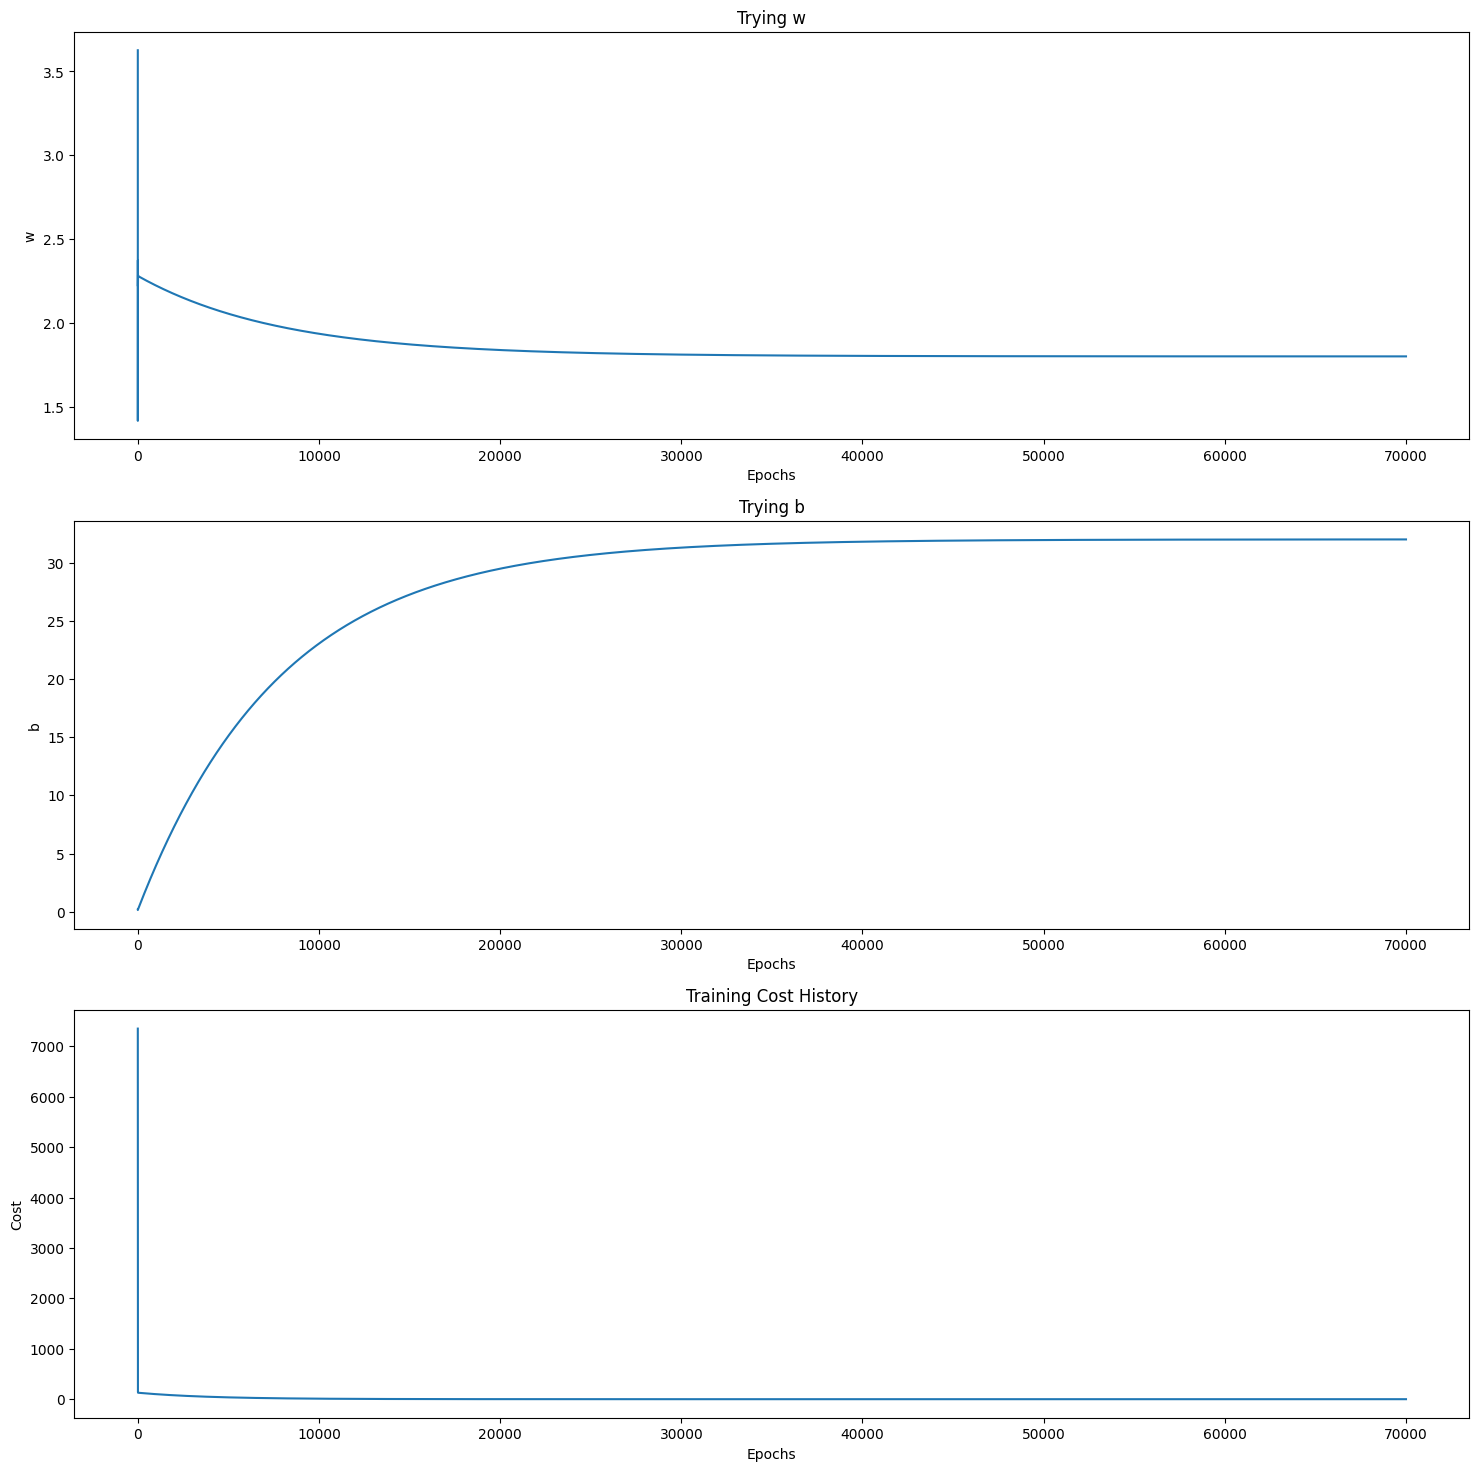

In [49]:
import matplotlib.pyplot as plt
# Plot tryingw and tryingb
plt.figure(figsize=(18, 18))
plt.subplot(3, 1, 1)
plt.plot(tryingw)
plt.title("Trying w")
plt.xlabel("Epochs")
plt.ylabel("w")

plt.subplot(3, 1, 2)
plt.plot(tryingb)
plt.title("Trying b")
plt.xlabel("Epochs")
plt.ylabel("b")

# Plot training cost history
plt.subplot(3, 1, 3)
plt.plot(trainingCostHistory)
plt.title("Training Cost History")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

